# Diana Angélica Martínez Hernández
# Alberto Isaac Pico Lara
## Proyecto final de Minería de Datos

#### Librerías necesarias para exploración y tratamiento de datos

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display  import Audio
from sklearn import preprocessing

#### Ruta a los archivos de audio de cada uno de los géneros (Prog, Salsa, Electro) y creación de listas con los nombres de los archivos en cada ruta, así como una lista que contenga todas las pistas

In [19]:
ruta_prog = '..\prog'
pistas_p = os.listdir(ruta_prog)
ruta_salsa = '..\salsa'
pistas_s = os.listdir(ruta_salsa)
ruta_electro = '..\electronica'
pistas_e = os.listdir(ruta_electro)
pistas_unif = pistas_p + pistas_s + pistas_e
generos = ['prog', 'salsa', 'electronica']

In [20]:
print('# de pistas prog: ', len(pistas_p))
print('# de pistas de Salsa: ', len(pistas_s))
print('# de pistas de electro: ', len(pistas_e))
print('# total de pistas:', len(pistas_unif))

# de pistas prog:  130
# de pistas de Salsa:  130
# de pistas de electro:  130
# total de pistas: 390


### Ejemplos de análisis de una pista aleatoria por cada género

In [21]:
a = randint(0, 129)

In [22]:
samples_p, sr_p = librosa.load(ruta_prog + '\\' + pistas_p[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_s, sr_s = librosa.load(ruta_salsa + '\\' + pistas_s[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_e, sr_e = librosa.load(ruta_electro + '\\' + pistas_e[a], sr = None, mono = True, offset = 0.0, duration = None)

In [23]:
print('Tamaño de muestreo (samples) prog: ', len(samples_p))
print('Tasa de muestreo (sampling rate) prog: ', sr_p)
print('Tamaño de muestreo (samples) salsa: ', len(samples_s))
print('Tasa de muestreo (sampling rate) salsa: ', sr_s)
print('Tamaño de muestreo (samples) electro: ', len(samples_e))
print('Tasa de muestreo (sampling rate) electro: ', sr_e)

Tamaño de muestreo (samples) prog:  2647296
Tasa de muestreo (sampling rate) prog:  44100
Tamaño de muestreo (samples) salsa:  2641536
Tasa de muestreo (sampling rate) salsa:  44100
Tamaño de muestreo (samples) electro:  2640384
Tasa de muestreo (sampling rate) electro:  44100


#### Pistas cargadas

In [24]:
print(pistas_p[a])

05 Panic Attack_03m_00s__04m_00s.mp3


In [25]:
Audio(ruta_prog + '\\' + pistas_p[a])

Text(0.5, 1.0, '05 Panic Attack_03m_00s__04m_00s.mp3')

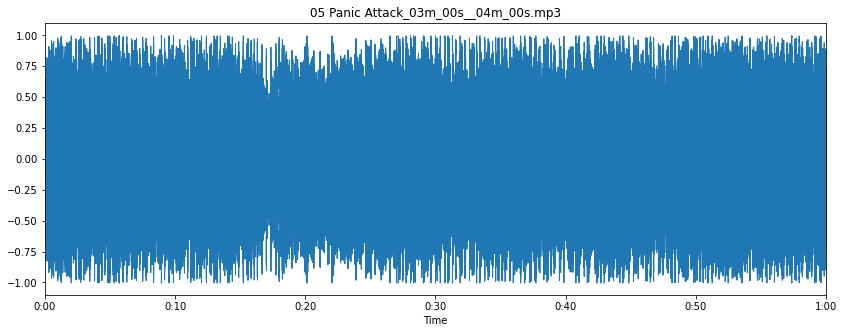

In [26]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_p, sr = sr_p)
plt.title(pistas_p[a])

Text(0.5, 1.0, '05 Panic Attack_03m_00s__04m_00s.mp3')

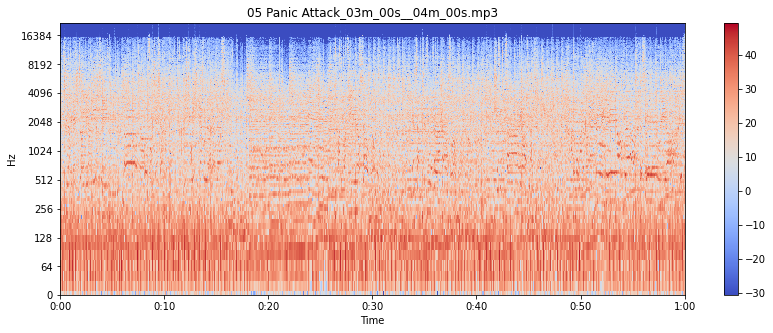

In [27]:
X = librosa.stft(samples_p)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_p, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_p[a])

In [28]:
print(pistas_s[a])

035TU NO LE AMAS LE TEMES-LUIS ENRIQUE_01m_00s__02m_00s.mp3


In [29]:
Audio(ruta_salsa + '\\' + pistas_s[a])

Text(0.5, 1.0, '035TU NO LE AMAS LE TEMES-LUIS ENRIQUE_01m_00s__02m_00s.mp3')

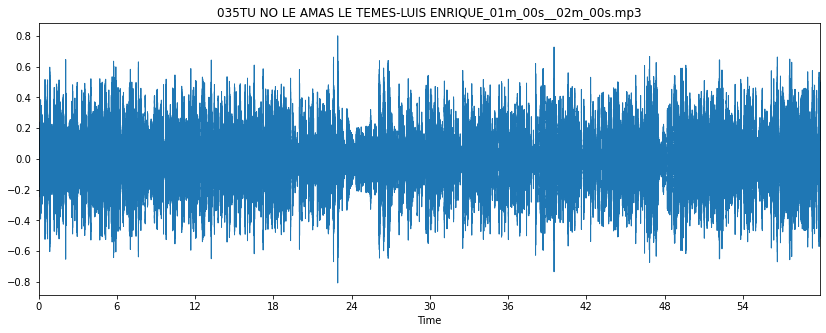

In [30]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_s, sr = sr_s)
plt.title(pistas_s[a])

Text(0.5, 1.0, '035TU NO LE AMAS LE TEMES-LUIS ENRIQUE_01m_00s__02m_00s.mp3')

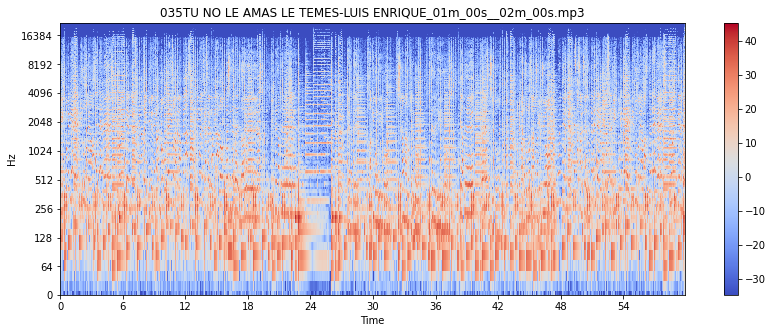

In [31]:
X = librosa.stft(samples_s)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_s, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_s[a])

In [32]:
print(pistas_e[a])

DINASTY_01m_00s__02m_00s.mp3


In [33]:
Audio(ruta_electro + '\\' + pistas_e[a])

Text(0.5, 1.0, 'DINASTY_01m_00s__02m_00s.mp3')

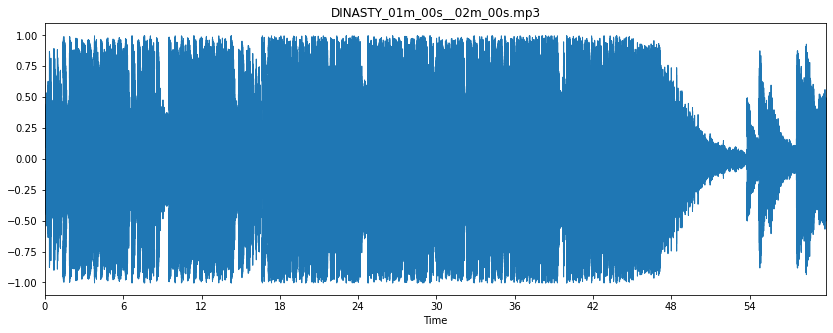

In [34]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_e, sr = sr_e)
plt.title(pistas_e[a])

Text(0.5, 1.0, 'DINASTY_01m_00s__02m_00s.mp3')

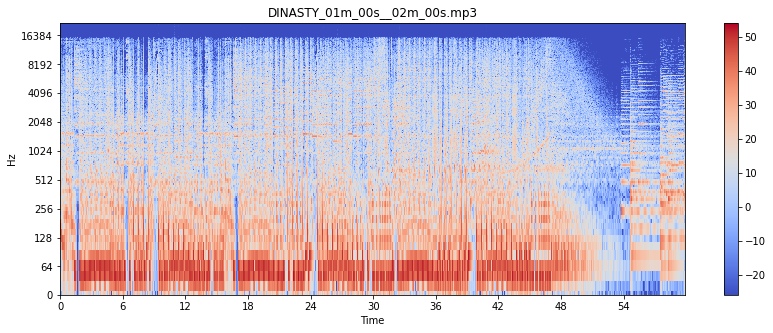

In [35]:
X = librosa.stft(samples_e)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_e, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_e[a])

### Selección de características ejemplo
Algunas de las caracerísticas que se pueden extraer del audio son las siguientes:
#### Característica espectrales del audio
- Zero crossing rate: tasa de cambios de signo a través de una señal
- Spectral centroid: Indica en donde está el "centro de masa" (mayor sendidad de muestras) de una pista de audio
- Spectrall Rolloff: La medida de la forma de la señal, representa la frecuencia de la señal debajo de un porcentaje especifico, se trabajará con el 100%
- Mel Frecuency cepstral coeficients: los MFCC de una señal son sunconjuntos de características que describen de manera concisa la forma general del espectro. Esta técnica se usa para el análisis de la voz humana 
- Chroma frecuencies: Representación de los 12 semitonos que existen en la octava musical
#### Características rítmicas
- Tempograma: Estimación de los BPM de cada pista

En las siguientes líneas se muestra con una pista ejemplo la extracción y visualización de una pista, más adelante se les hará la extracción a las 390 pistas que forman parte del conjunto de datos elegido.

Text(0.5, 1.0, '05 Panic Attack_03m_00s__04m_00s.mp3')

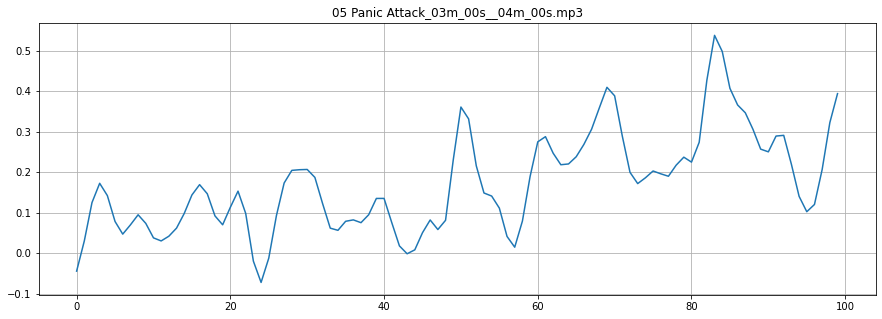

In [36]:
#Zero crossing rate
n0 = 9000
n1 = 9100
plt.figure(figsize=(15, 5))
plt.plot(samples_p[n0:n1])
plt.grid()
plt.title(pistas_p[a])

A simple vista se aprecian 3 cruces con el 0, se verifica con la lbrería librosa

In [54]:
zero_crossings = librosa.zero_crossings(samples_p[n0:n1], pad=False)
print(sum(zero_crossings))

samples_p

5


array([ 0.        ,  0.        ,  0.        , ..., -0.23852539,
       -0.20890808, -0.09159851], dtype=float32)

In [38]:
#spectral centroid, calcula el crentoide espectral para cada cuadro de la señal
spectral_centroids = librosa.feature.spectral_centroid(samples_p, sr=sr_p)[0]
spectral_centroids.shape

(5171,)

In [39]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [40]:
def normalize(x, axis = 0):
    return preprocessing.minmax_scale(x, axis = axis)

Text(0.5, 1.0, '05 Panic Attack_03m_00s__04m_00s.mp3')

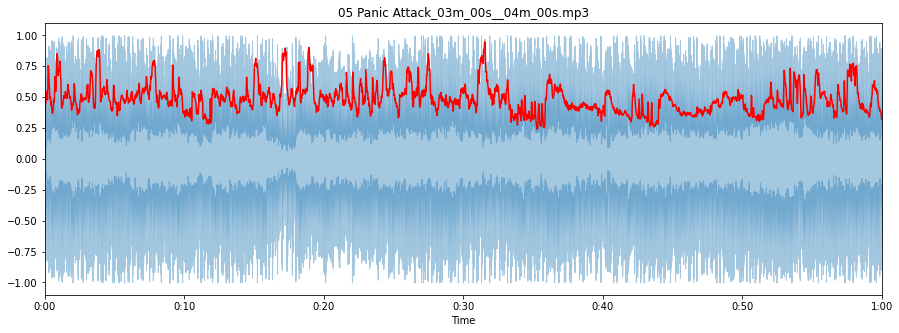

In [41]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr=sr_p, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title(pistas_p[a])

Text(0.5, 1.0, '05 Panic Attack_03m_00s__04m_00s.mp3')

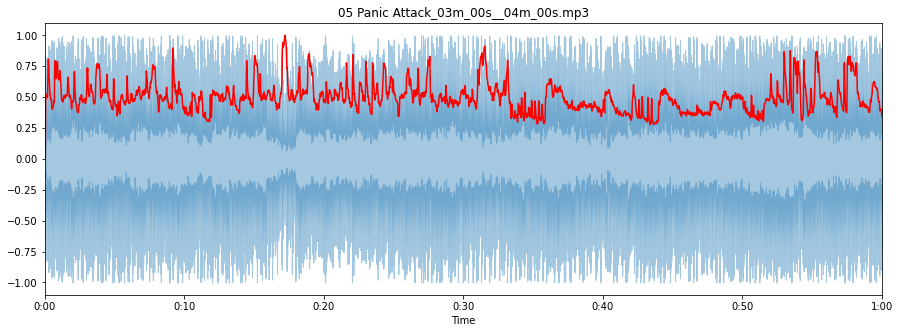

In [42]:
#spectral rolloff
spr = librosa.feature.spectral_rolloff(samples_p+0.01, sr = sr_p)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr = sr_p, alpha = 0.4)
plt.plot(t, normalize(spr), color = 'r')
plt.title(pistas_p[a])

In [43]:
#MFCC
mfccs = librosa.feature.mfcc(samples_p, sr = sr_p)
mfccs.shape

(20, 5171)

In [44]:
#20 MFCC en 5,171 cuadros

Text(0.5, 1.0, '05 Panic Attack_03m_00s__04m_00s.mp3')

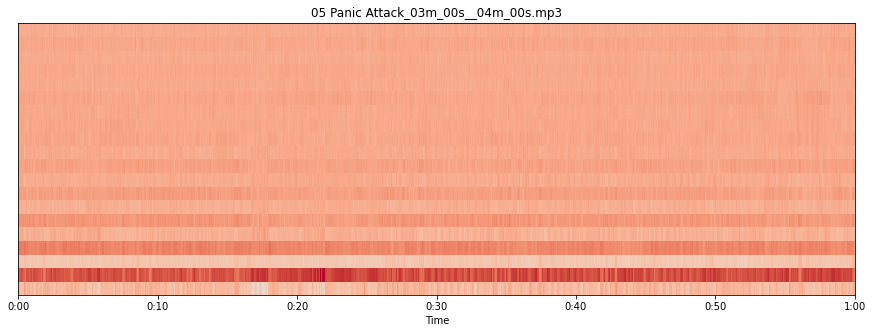

In [45]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr_p, x_axis='time')
plt.title(pistas_p[a])

Text(0.5, 1.0, '05 Panic Attack_03m_00s__04m_00s.mp3')

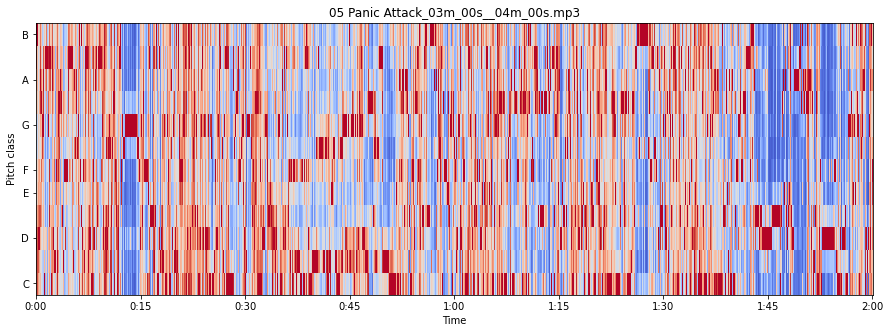

In [46]:
#Chroma frecuencies: representación de la escala cromática en 12 semitonos
salto = 512
cromatica = librosa.feature.chroma_stft(samples_p, sr=sr_p, hop_length=salto)
plt.figure(figsize=(15, 5))
librosa.display.specshow(cromatica, x_axis='time', y_axis='chroma', hop_length=salto, cmap='coolwarm')
plt.title(pistas_p[a])

In [47]:
#Temmpograma
hop_length = 512
env = librosa.onset.onset_strength(y = samples_p, sr = sr_p, hop_length = hop_length)
tempograma = librosa.feature.tempogram(onset_envelope = env, sr = sr_p, hop_length = hop_length)

auto_c = librosa.autocorrelate(env, max_size = tempograma.shape[0])
auto_c = librosa.util.normalize(auto_c)

#mostrar los "beats"
tempo = librosa.beat.tempo(onset_envelope = env, sr = sr_p, hop_length = hop_length)[0]
print(tempo)
print(auto_c.shape)

126.04801829268293
(384,)


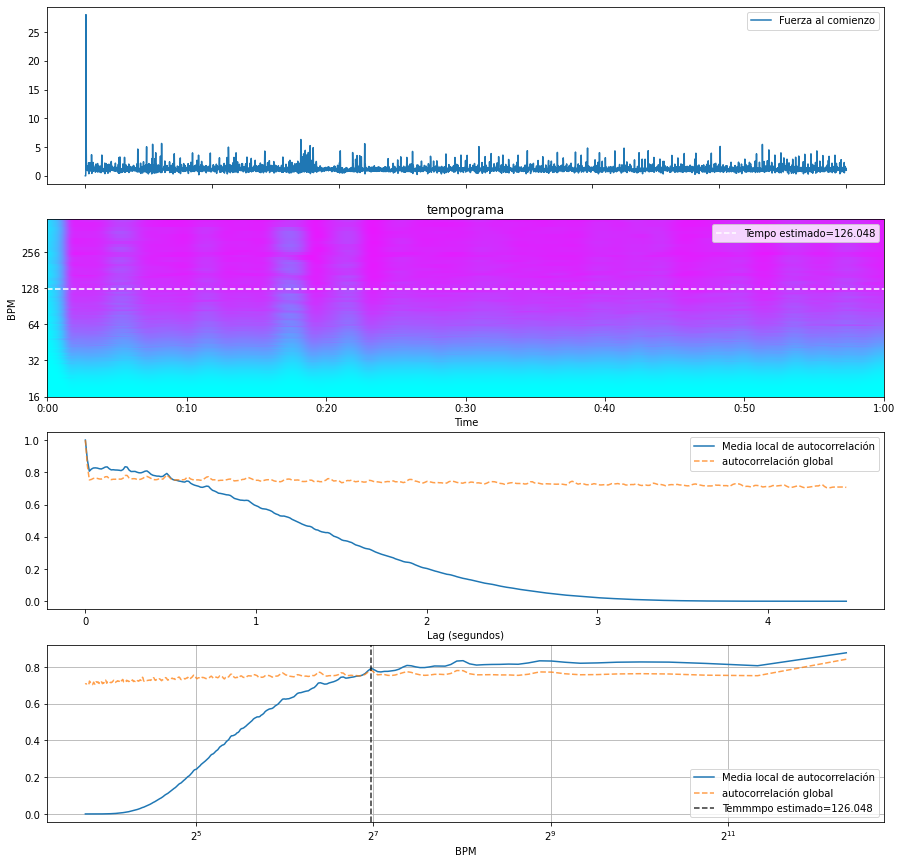

In [48]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 15))
tiempos = librosa.times_like(env, sr=sr_p, hop_length=hop_length)
ax[0].plot(tiempos, env, label='Fuerza al comienzo')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool',ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='tempograma')
x = np.linspace(0, tempograma.shape[0] * float(hop_length) / sr_p,num=tempograma.shape[0])
ax[2].plot(x, np.mean(tempograma, axis=1), label='Media local de autocorrelación')
ax[2].plot(x, auto_c, '--', alpha=0.75, label='autocorrelación global')
ax[2].set(xlabel='Lag (segundos)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempograma.shape[0], hop_length=hop_length, sr=sr_p)
ax[3].semilogx(freqs[1:], np.mean(tempograma[1:], axis=1),label='Media local de autocorrelación', basex=2)
ax[3].semilogx(freqs[1:], auto_c[1:], '--', alpha=0.75,label='autocorrelación global', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,label='Temmmpo estimado={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

Text(0.5, 1.0, 'tempograma de 05 Panic Attack_03m_00s__04m_00s.mp3')

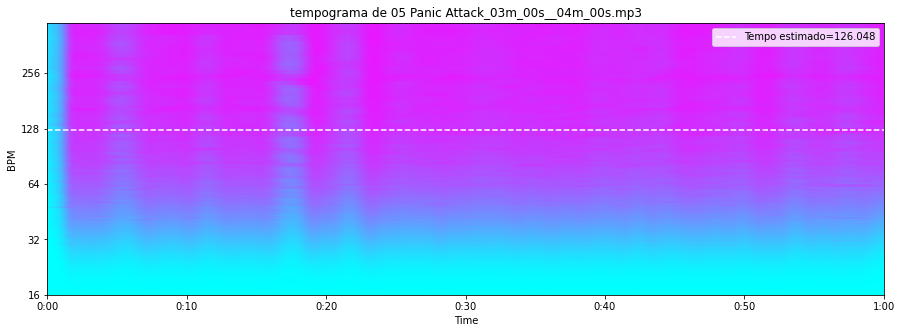

In [49]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
plt.legend(loc='upper right')
plt.title('tempograma de ' + pistas_p[a])

## Extraer expectrograma de cada canción

In [4]:
import pathlib

In [229]:
colores = plt.get_cmap('cool')
plt.figure(figsize=(20, 8))

for i in generos:
    pathlib.Path(f'..\espectrogramas\{i}').mkdir(parents = True, exist_ok = True)

for pista in pistas_p:
    samples, sr = librosa.load( '..\\prog\\' + pista , sr = None, mono = True, offset = 0.0, duration = None)
    X = librosa.stft(samples)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.title(pista)
    plt.savefig(f'..\espectrogramas\\prog\\' + pista + '.png')
    plt.clf()
    
for pista in pistas_s:
    samples, sr = librosa.load( '..\\salsa\\' + pista , sr = None, mono = True, offset = 0.0, duration = None)
    X = librosa.stft(samples)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.title(pista)
    plt.savefig(f'..\espectrogramas\\salsa\\' + pista + '.png')
    plt.clf()

for pista in pistas_e:
    samples, sr = librosa.load( '..\\electronica\\' + pista , sr = None, mono = True, offset = 0.0, duration = None)
    X = librosa.stft(samples)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.title(pista)
    plt.savefig(f'..\espectrogramas\\electronica\\' + pista + '.png')
    plt.clf()

<Figure size 1440x576 with 0 Axes>

## Extraer características de cada canción

In [50]:
header = ['archivo', 'zero_cr', 'spectral_centroid' ,'spectral_rf', 'croma']
for x in range(1, 21):
    header.append(f'mfcc_{x}')
header.append('BPM')
header.append('genero')
header

['archivo',
 'zero_cr',
 'spectral_centroid',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'genero']

In [56]:
%%time
import csv
from csv import writer
hop_length = 512
archivo = open("..\\data_set\\datos_musica.csv", 'w', newline = '')
with archivo:
    writer = csv.writer(archivo)
    writer.writerow(header)
for g in generos:
    for nombre in os.listdir(f'..\{g}'):
        cancion = f'..\{g}\{nombre}'
        samples, sr = librosa.load(cancion, sr = None, mono = True, offset = 0.0, duration = None)
        nombre = nombre.replace(' ', '')
        zero_crossings = np.mean(librosa.zero_crossings(samples[n0:n1], pad=False))
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y = samples, sr = sr))
        spectral_rf = np.mean(librosa.feature.spectral_rolloff(y = samples, sr = sr))
        croma = np.mean(librosa.feature.chroma_stft(y = samples, sr = sr))
        mfcc = librosa.feature.mfcc(y = samples, sr = sr)
        env = librosa.onset.onset_strength(y = samples_p, sr = sr, hop_length = hop_length)
        BPM = librosa.beat.tempo(onset_envelope = env, sr = sr, hop_length = hop_length)[0]
        to_append = f'{nombre} {zero_crossings} {spectral_centroid} {spectral_rf} {croma}'
        for m in mfcc:
            to_append += f' {np.mean(m)}'
        to_append += f' {BPM} {g}'
        archivo = open('..\\data_set\\datos_musica.csv', 'a', newline = '')
        with archivo:
            writer = csv.writer(archivo)
            writer.writerow(to_append.split())

Wall time: 16min 18s
